In [1]:
# Groundtruth file

# Notebook used to generate the ground truth according to the position of prisms in post-process.

In [1]:
import sys
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install pycryptodome
#!{sys.executable} -m pip install pycryptodomex
#!{sys.executable} -m pip install gnupg
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scripts.theodolite_function as tfu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.theodolite_utils as ttfu

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
ttfu = importlib.reload(ttfu)
path = "./data/prediction/TS/20220505_cones/"
prefix = "GP-10-20"
P1 = np.array(ttfu.read_prediction_data_csv_file(path+prefix +"_1.csv"))
P2 = np.array(ttfu.read_prediction_data_csv_file(path+prefix +"_2.csv"))
P3 = np.array(ttfu.read_prediction_data_csv_file(path+prefix +"_3.csv"))

In [3]:
P = np.array([[-0.392668326142117,-0.069814514586953,0.374584168599603,1],
              [-0.648059668577012,-0.111780201302043,0.093650404401678,1],
              [-0.64132562193543,0.144081378108981,0.077352479138266,1]]).T

In [4]:
# Doing a minimization between these not moving points, and the 3D prism coordinates
# Pose_lidar is a list of each rigid transform founded
list_lidar_time = []
Pose_lidar = []
Prism_corrected = []
number = len(P1)
for i in range(0,number):
    Q = np.array([P1[i,1:4], P2[i,1:4], P3[i,1:4]]).T
    Q =np.concatenate((Q, np.array([[1,1,1]])), axis=0)
    T = ttfu.point_to_point_minimization(P, Q)
    Pose_lidar.append(T)
    prism_correct = T@P
    Prism_corrected.append(prism_correct)
    list_lidar_time.append(P1[i,0])

In [5]:
Pose_lidar_arr = np.array(Pose_lidar)
Prism_corrected_arr = np.array(Prism_corrected)
print(Pose_lidar_arr[:,0,3])
print(Prism_corrected[0][:,0])

[  -1.57311695   -1.57306036   -1.57300797   -1.57294223   -1.57286799
   -1.57281355   -1.57279898   -1.57282083   -1.57286862   -1.57293703
   -1.57301693   -1.57309204   -1.57315175   -1.57319444   -1.57322252
   -1.57324812   -1.57329514   -1.57338511   -1.57352689   -1.57372103
   -1.57396721   -1.57425354   -1.57451688   -1.57461909   -1.57438813
   -1.573695     -1.57251477   -1.57102764   -1.56975579   -1.56959712
   -1.57170888   -1.57734402   -1.58771628   -1.60367464   -1.62535873
   -1.65238899   -1.68426597   -1.72052312   -1.76081239   -1.80524867
   -1.8547697    -1.91112638   -1.9767109    -2.05436569   -2.14710288
   -2.25755865   -2.38742617   -2.53703692   -2.70479537   -2.88703567
   -3.07924633   -3.27771149   -3.47910749   -3.68062815   -3.88090621
   -4.07975731   -4.27753524   -4.47476949   -4.67193071   -4.8692901
   -5.06690572   -5.26477218   -5.46295864   -5.66152991   -5.86045721
   -6.05966034   -6.25906316   -6.45859954   -6.65816393   -6.85762123
   -7.0

<IPython.core.display.Javascript object>


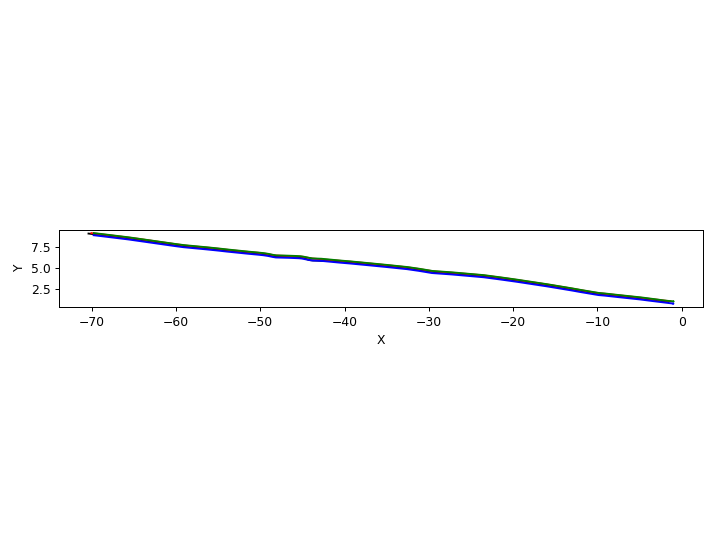

In [6]:
%matplotlib notebook
fig = plt.figure(figsize = (8, 6))
ax = plt.axes()
ax.plot(Pose_lidar_arr[0:400,0,3],Pose_lidar_arr[0:400,1,3], color='black')
ax.plot(Prism_corrected_arr[0:400,0,0],Prism_corrected_arr[0:400,1,0], color='red')
ax.plot(Prism_corrected_arr[0:400,0,1],Prism_corrected_arr[0:400,1,1], color='green')
ax.plot(Prism_corrected_arr[0:400,0,2],Prism_corrected_arr[0:400,1,2], color='blue')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_aspect('equal')
fig.tight_layout() 

<IPython.core.display.Javascript object>


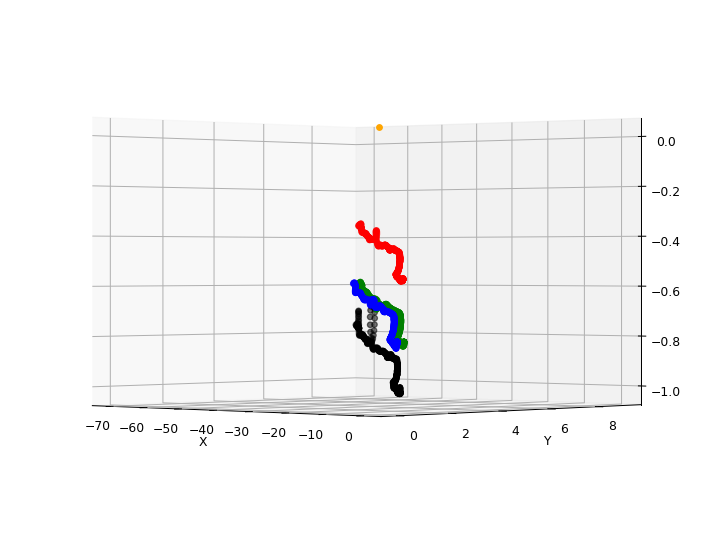

In [7]:
%matplotlib notebook
fig = plt.figure(figsize = (8, 6))
ax = plt.axes(projection ="3d")
ax.scatter3D(Pose_lidar_arr[0:400,0,3],Pose_lidar_arr[0:400,1,3],Pose_lidar_arr[0:400,2,3], color='black')
ax.scatter3D(Prism_corrected_arr[0:400,0,0],Prism_corrected_arr[0:400,1,0],Prism_corrected_arr[0:400,2,0], color='red')
ax.scatter3D(Prism_corrected_arr[0:400,0,1],Prism_corrected_arr[0:400,1,1],Prism_corrected_arr[0:400,2,1], color='green')
ax.scatter3D(Prism_corrected_arr[0:400,0,2],Prism_corrected_arr[0:400,1,2],Prism_corrected_arr[0:400,2,2], color='blue')
ax.scatter3D(0,0,0, color='orange')
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.tight_layout()

<IPython.core.display.Javascript object>


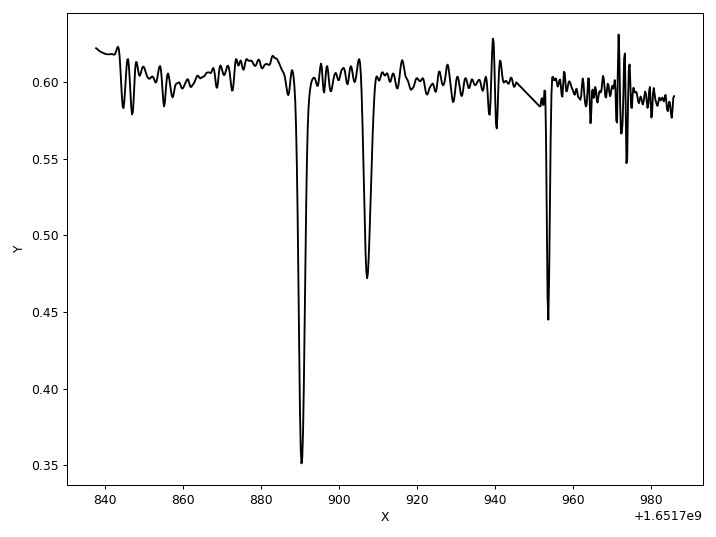

In [8]:
%matplotlib notebook
fig = plt.figure(figsize = (8, 6))
ax = plt.axes()
ax.plot(list_lidar_time,Pose_lidar_arr[:,0,2], color='black')
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.tight_layout() 

In [8]:
ttfu = importlib.reload(ttfu)
output = "./data/groundtruth/20220505_cones/"
file_name = "marmotte_cones.txt"
ttfu.grountruth_GP_convert_for_eval(list_lidar_time, Pose_lidar, output+file_name)

Conversion done !
